# Customer Churn Analysis
## Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [3]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 6\Telecom_customer_churn.csv")
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Shape of the dataset

In [4]:
df.shape

(7043, 21)

The dataset contains 7043 rows and 21 columns

# Check the concise summary of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking for null values

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values found in the dataset

# Check uniqueness in features

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Almost every features are categorical

# Check duplicates

In [8]:
df.duplicated().sum()

0

No duplicates found the dataset

# Visualizing using pie graph

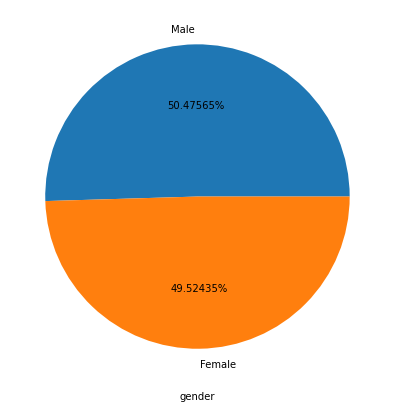

<Figure size 432x288 with 0 Axes>

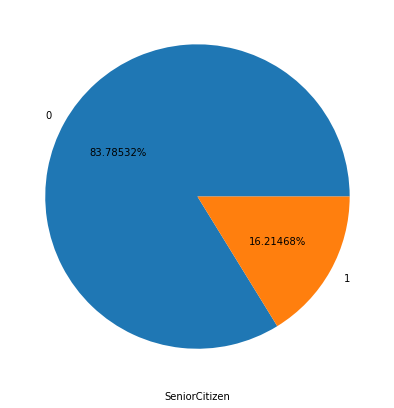

<Figure size 432x288 with 0 Axes>

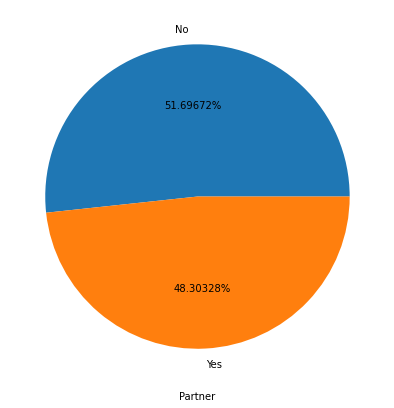

<Figure size 432x288 with 0 Axes>

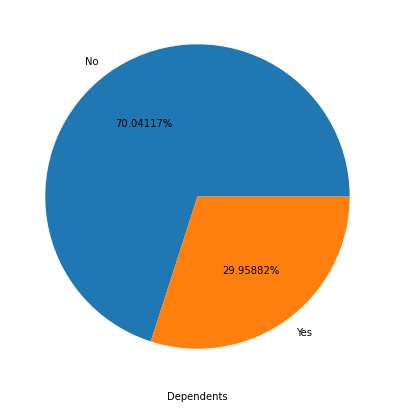

<Figure size 432x288 with 0 Axes>

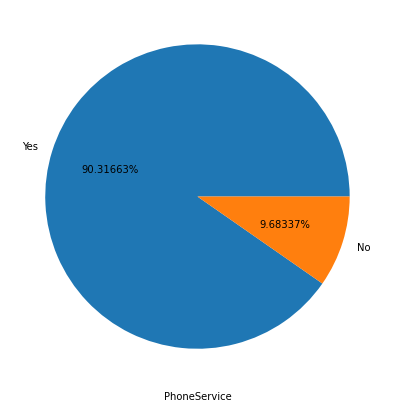

<Figure size 432x288 with 0 Axes>

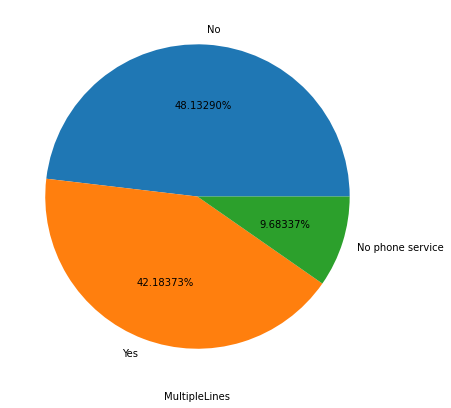

<Figure size 432x288 with 0 Axes>

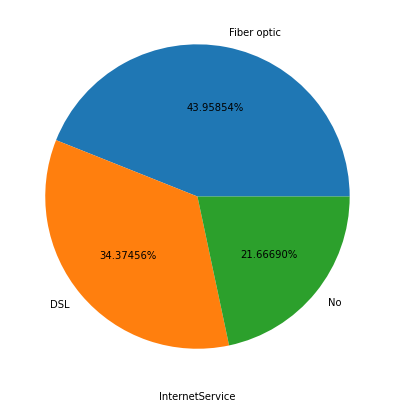

<Figure size 432x288 with 0 Axes>

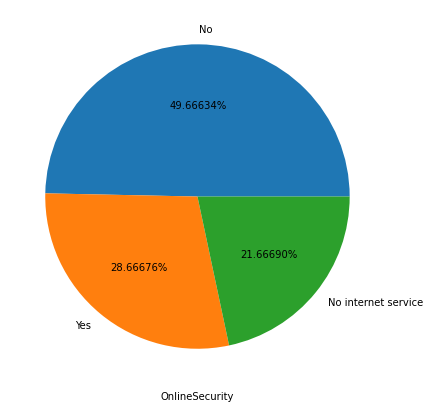

<Figure size 432x288 with 0 Axes>

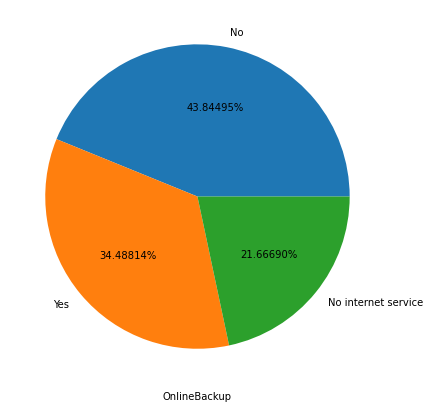

<Figure size 432x288 with 0 Axes>

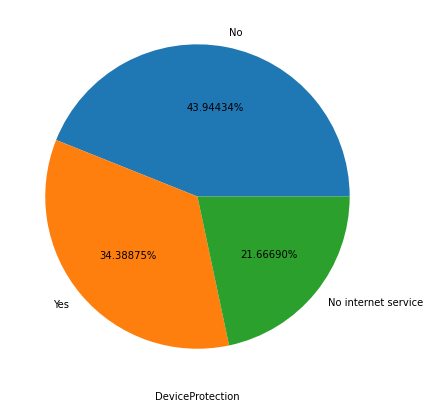

<Figure size 432x288 with 0 Axes>

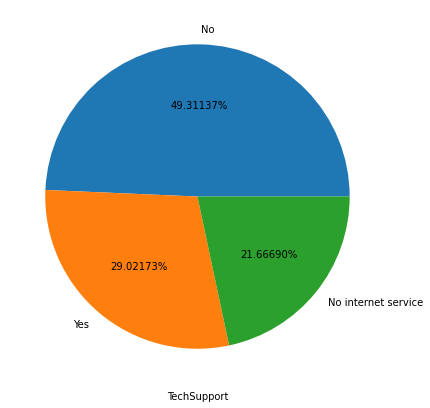

<Figure size 432x288 with 0 Axes>

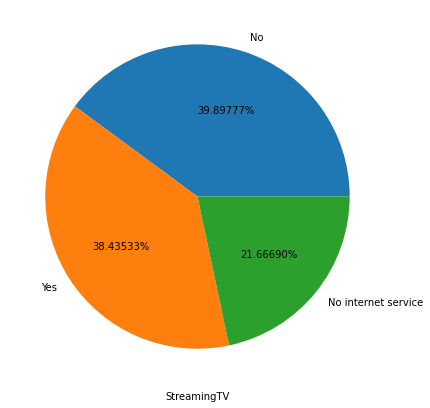

<Figure size 432x288 with 0 Axes>

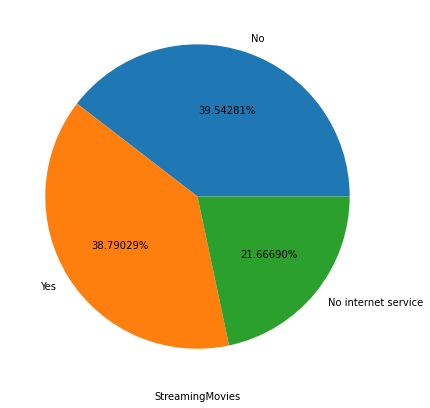

<Figure size 432x288 with 0 Axes>

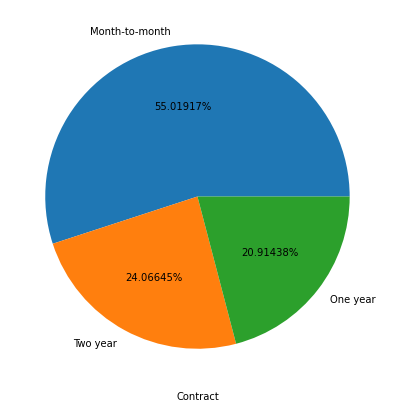

<Figure size 432x288 with 0 Axes>

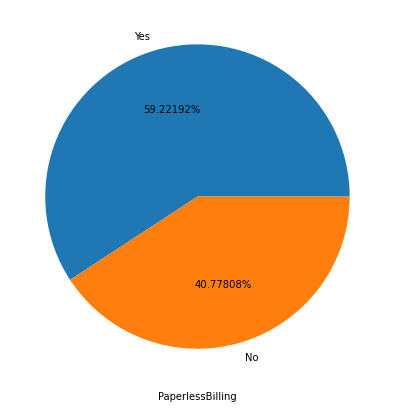

<Figure size 432x288 with 0 Axes>

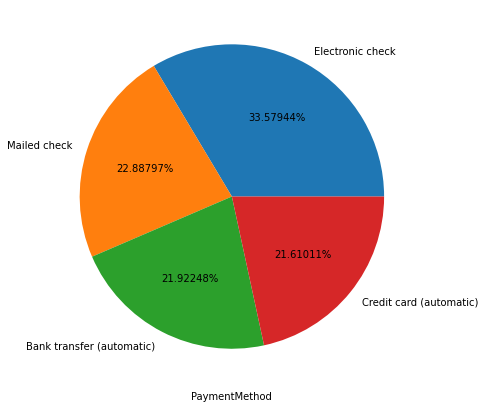

<Figure size 432x288 with 0 Axes>

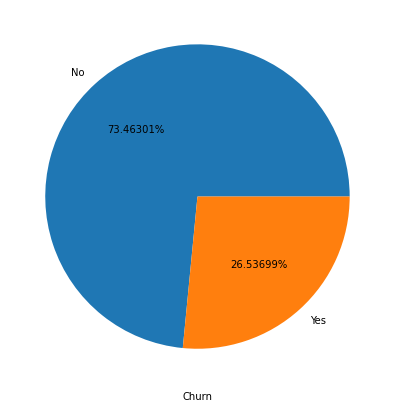

<Figure size 432x288 with 0 Axes>

In [9]:
for i in df.columns:
    if i!='MonthlyCharges':
        if i!='tenure':
            if i!='customerID':
                if i!='TotalCharges':
                    plt.figure(figsize=(10,7))
                    df[i].value_counts().plot.pie(autopct='%1.5f%%')
                    fig=plt.gcf()
                    plt.xlabel(i)
                    plt.ylabel('')
                    plt.figure()

Hence, visualize all the categorical features present in the dataset using pie plot

# Data Preprrocessing

In [10]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No_phone_service')
df['InternetService'] = df['InternetService'].replace('Fiber optic', 'Fiber_optic')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No_internet_service')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service', 'No_internet_service')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service', 'No_internet_service')
df['TechSupport'] = df['TechSupport'].replace('No internet service', 'No_internet_service')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service', 'No_internet_service')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service', 'No_internet_service')
df['Contract'] = df['Contract'].replace('Month-to-month', 'Month_to_month')
df['Contract'] = df['Contract'].replace('One year', 'One_year')
df['Contract'] = df['Contract'].replace('Two year', 'Two_year')
df['PaymentMethod'] = df['PaymentMethod'].replace('Electronic check', 'Electronic_check')
df['PaymentMethod'] = df['PaymentMethod'].replace('Mailed check', 'Mailed_check')
df['PaymentMethod'] = df['PaymentMethod'].replace('Bank transfer (automatic)', 'Bank_transfer_automatic')
df['PaymentMethod'] = df['PaymentMethod'].replace('Credit card (automatic)', 'Credit_card_automatic')

In [11]:
df['TotalCharges'].mode()

0        
1    20.2
dtype: object

In [12]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '20.20')

In [13]:
def data_pipeline(df):
    df=df.drop(["customerID"], axis=1)
    df.gender.replace(to_replace=dict(Female=1, Male=0), inplace=True)
    df.Partner.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df.Dependents.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df.PhoneService.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df.MultipleLines.replace(to_replace=dict(Yes=1, No=0, No_phone_service=2), inplace=True)
    df.InternetService.replace(to_replace=dict(DSL=1, Fiber_optic=2, No=0), inplace=True)
    df.OnlineSecurity.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.OnlineBackup.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.DeviceProtection.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.TechSupport.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.StreamingTV.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.StreamingMovies.replace(to_replace=dict(Yes=1, No=0, No_internet_service=2), inplace=True)
    df.Contract.replace(to_replace=dict(Month_to_month=1, One_year=0, Two_year=2), inplace=True)
    df.PaperlessBilling.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    df.PaymentMethod.replace(to_replace=dict(Electronic_check=0, Mailed_check=1, Bank_transfer_automatic=2, Credit_card_automatic=3), inplace=True)
    df.Churn.replace(to_replace=dict(Yes=1, No=0), inplace=True)
    return df

In [14]:
df = data_pipeline(df)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,1,0,1,0,0,0,0,1,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,0,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,1,53.85,108.15,1
3,0,0,0,0,45,0,2,1,1,0,1,1,0,0,0,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,0,70.70,151.65,1


Observations:
* replace some of the categorical values for ease
* encoded every variables of the features into numeric data

# Check the statistical summary of the dataframe

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.615505,0.656039,0.00,0.0,1.00,1.00,2.00
InternetService,7043.0,1.222916,0.778877,0.00,1.0,1.00,2.00,2.00
OnlineSecurity,7043.0,0.720006,0.796885,0.00,0.0,1.00,1.00,2.00
OnlineBackup,7043.0,0.778220,0.778472,0.00,0.0,1.00,1.00,2.00


Statistical analysis of the data

# Exploratory Data Analysis

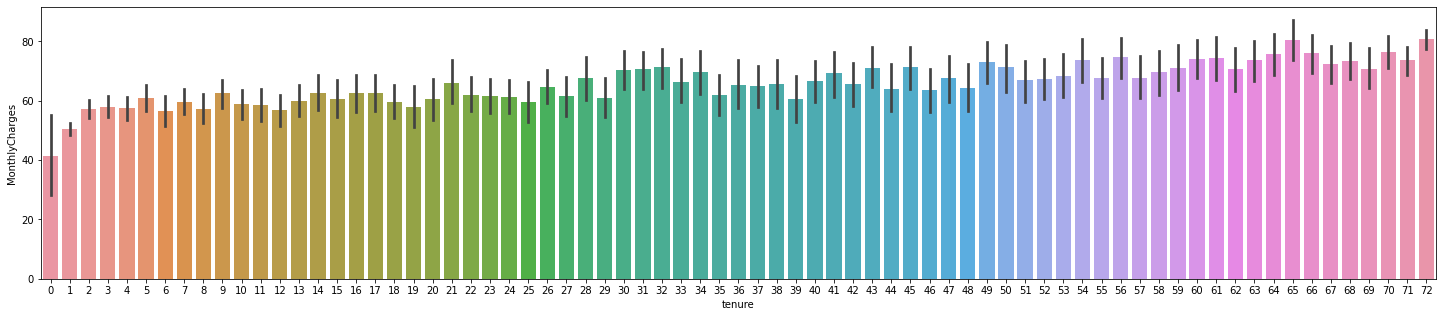

In [17]:
plt.figure(figsize=(25,5))
sns.barplot(x = df.tenure, y = df.MonthlyCharges)
plt.show()

The plot shows the tenre features with it's monthly charges

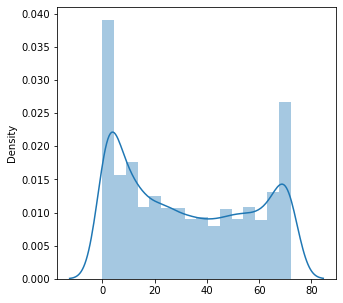

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(x = df.tenure)
plt.show()

The density plot of the tunure feature

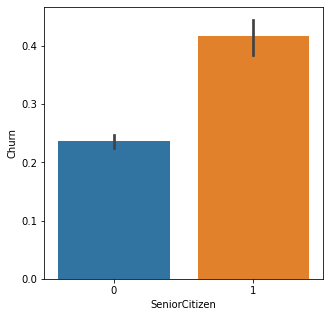

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x = df.SeniorCitizen, y = df.Churn)
plt.show()

Show relationship betweet SeniorCitizen and Churn

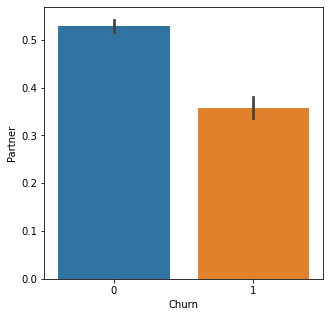

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x = df.Churn, y = df.Partner)
plt.show()

Relation between Churn and partner

In [21]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [22]:
df.TotalCharges.dtype

dtype('float64')

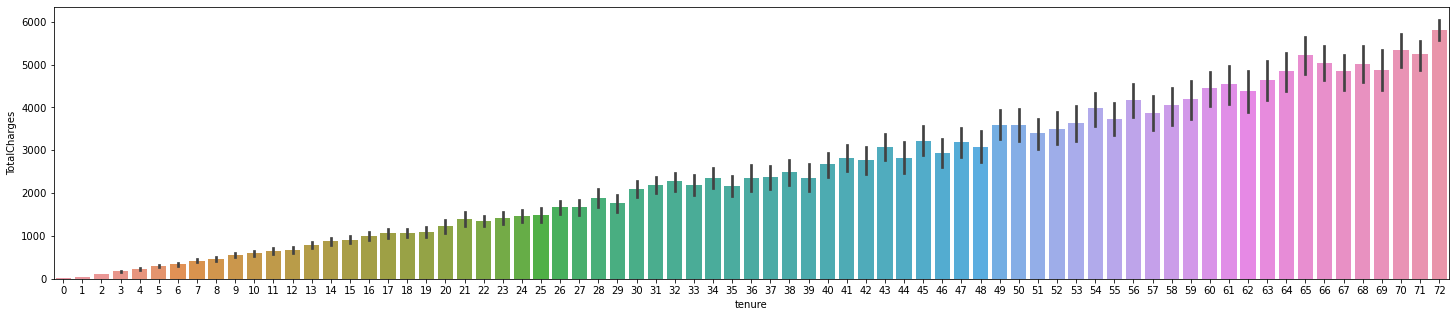

In [23]:
plt.figure(figsize=(25,5))
sns.barplot(x = df.tenure, y = df.TotalCharges)
plt.show()

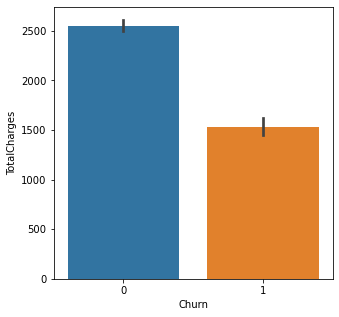

In [24]:
plt.figure(figsize=(5,5))
sns.barplot(x = df.Churn, y = df.TotalCharges)
plt.show()

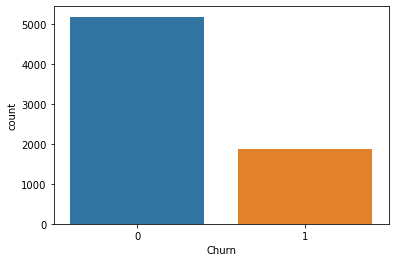

In [25]:
sns.countplot(df.Churn)
plt.show()

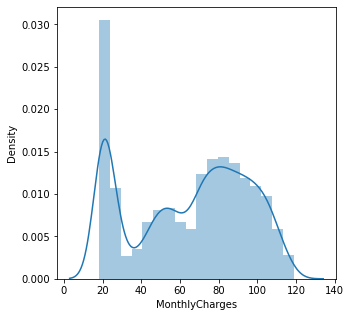

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(df.MonthlyCharges)
plt.show()

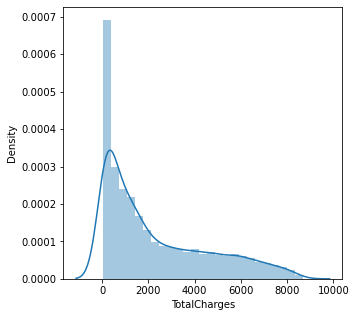

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(df.TotalCharges)
plt.show()

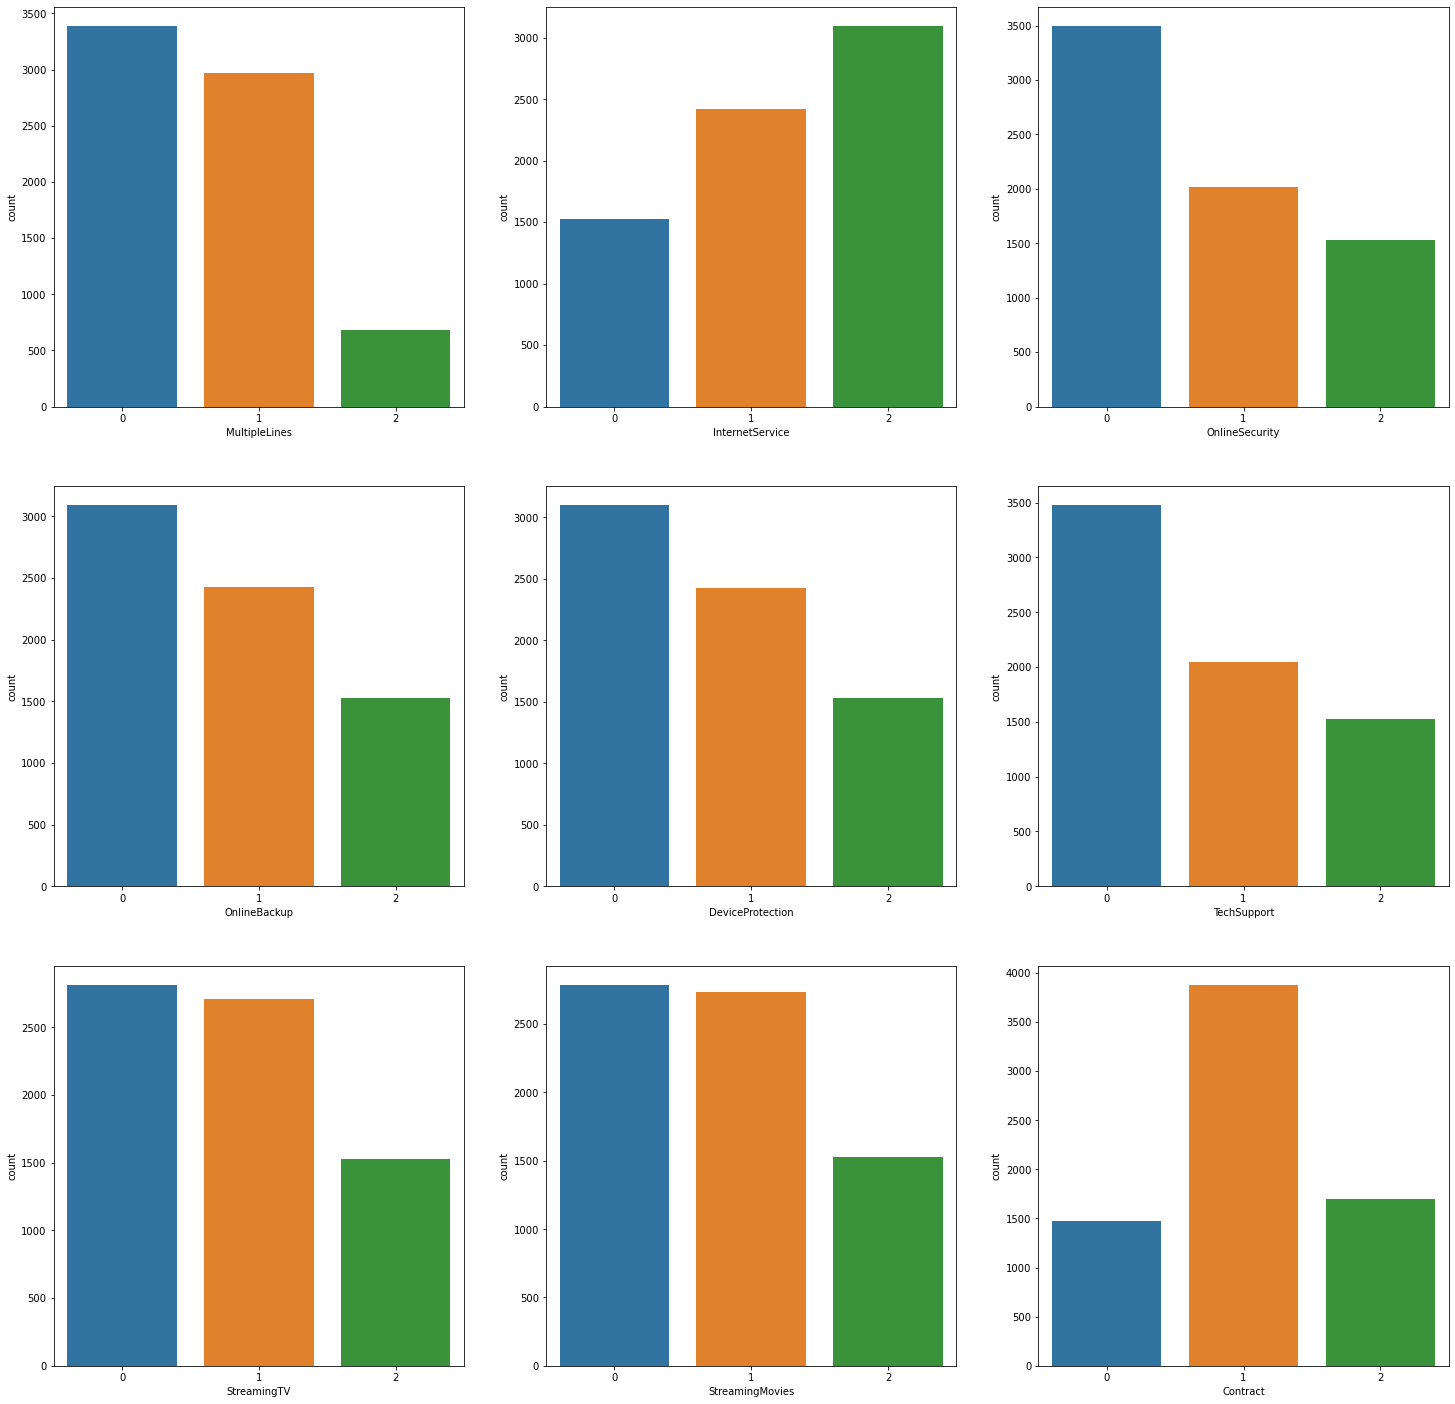

In [28]:
plt.figure(figsize=(25,25))
plt.subplot(3,3,1)
sns.countplot(df.MultipleLines)
plt.subplot(3,3,2)
sns.countplot(df.InternetService)
plt.subplot(3,3,3)
sns.countplot(df.OnlineSecurity)
plt.subplot(3,3,4)
sns.countplot(df.OnlineBackup)
plt.subplot(3,3,5)
sns.countplot(df.DeviceProtection)
plt.subplot(3,3,6)
sns.countplot(df.TechSupport)
plt.subplot(3,3,7)
sns.countplot(df.StreamingTV)
plt.subplot(3,3,8)
sns.countplot(df.StreamingMovies)
plt.subplot(3,3,9)
sns.countplot(df.Contract)
plt.show()

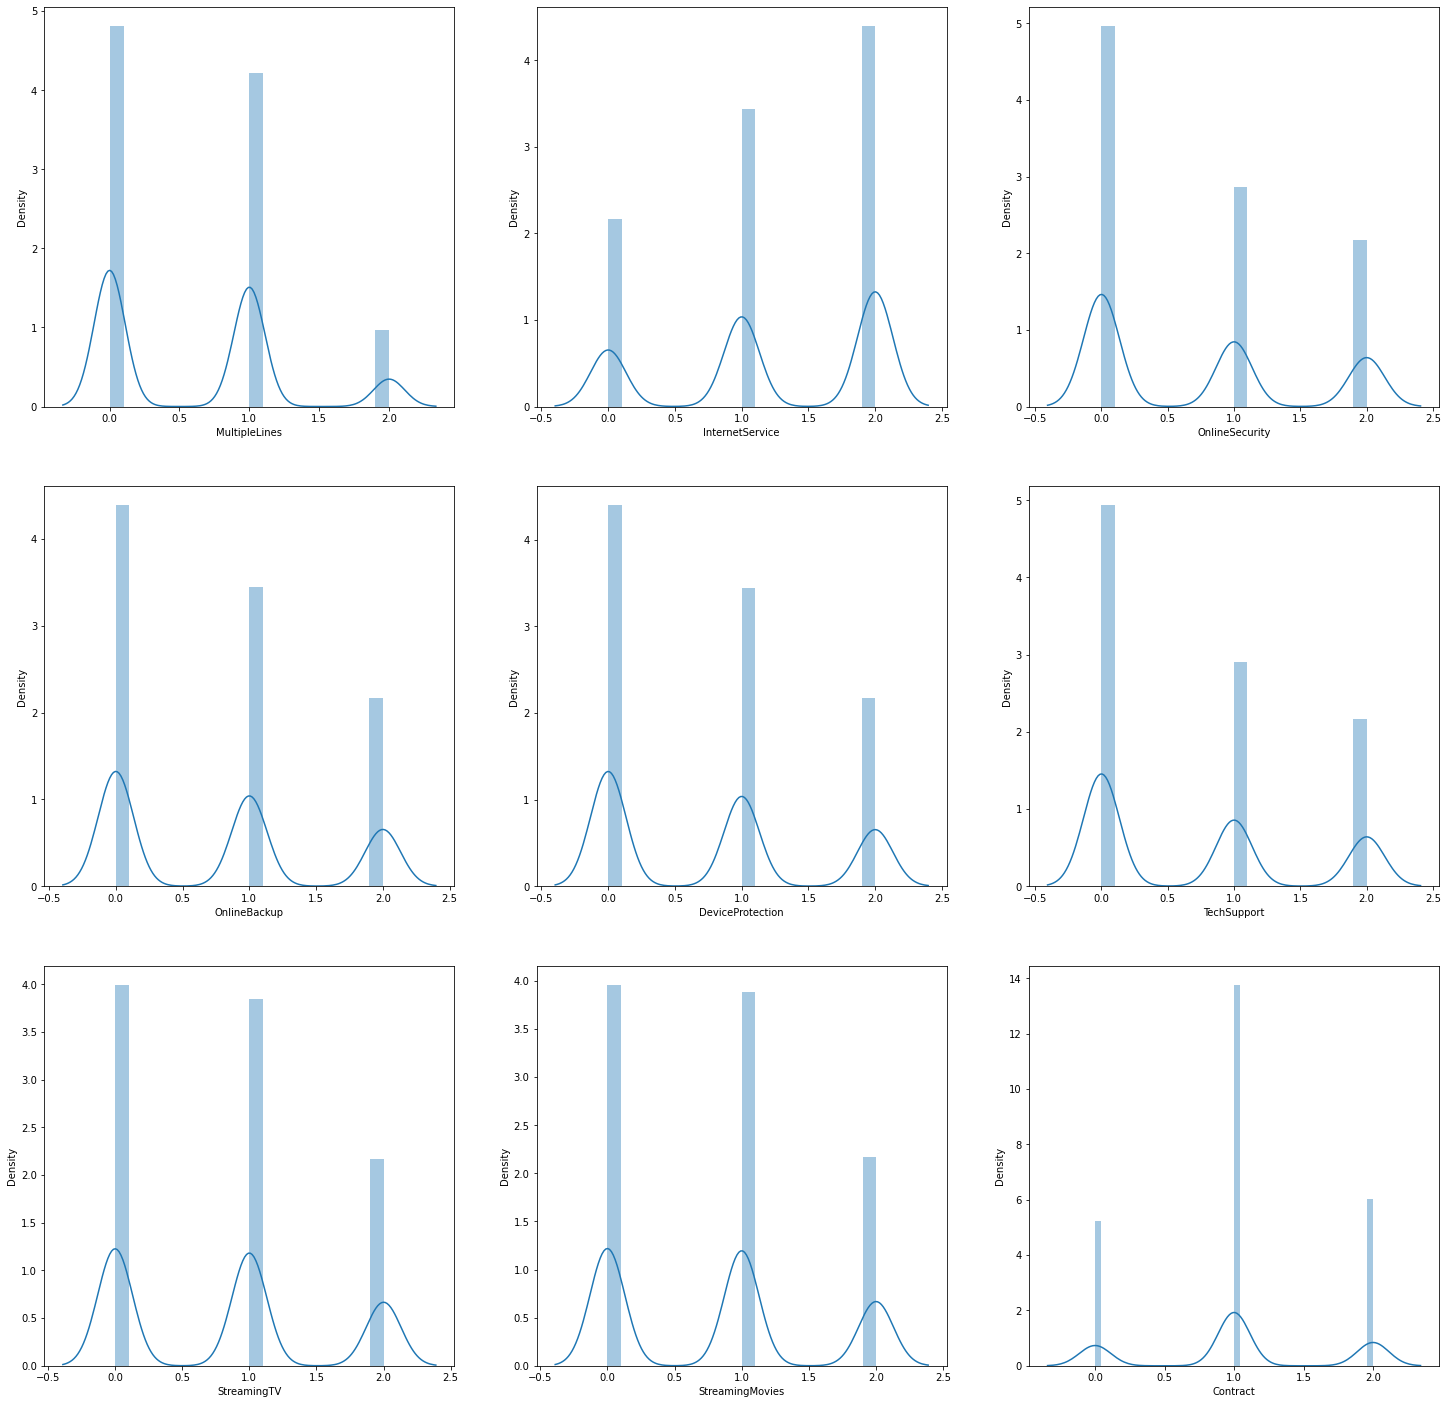

In [29]:
plt.figure(figsize=(25,25))
plt.subplot(3,3,1)
sns.distplot(df.MultipleLines)
plt.subplot(3,3,2)
sns.distplot(df.InternetService)
plt.subplot(3,3,3)
sns.distplot(df.OnlineSecurity)
plt.subplot(3,3,4)
sns.distplot(df.OnlineBackup)
plt.subplot(3,3,5)
sns.distplot(df.DeviceProtection)
plt.subplot(3,3,6)
sns.distplot(df.TechSupport)
plt.subplot(3,3,7)
sns.distplot(df.StreamingTV)
plt.subplot(3,3,8)
sns.distplot(df.StreamingMovies)
plt.subplot(3,3,9)
sns.distplot(df.Contract)
plt.show()

# Check Correlation

In [30]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.000485,0.010380,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,0.007230,0.011754,0.005209,0.014569,0.000079,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.259390,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.046573,0.156530,-0.093704,0.220173,0.103001,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.108052,-0.014877,0.133115,0.096848,0.317518,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.089060,-0.111377,0.123844,-0.113890,0.062100,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.033230,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.233426,0.006152,0.340305,0.247900,0.826172,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.003940,0.016505,-0.004070,0.247398,0.113211,0.011942
MultipleLines,0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.049224,0.108230,0.030659,0.146153,0.250634,0.019423
InternetService,0.010380,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.117963,0.378108,-0.178137,0.905491,0.428955,0.316846
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.155107,-0.334003,0.213800,-0.621227,-0.154370,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.135381,-0.262402,0.182909,-0.538454,-0.086209,-0.291449


In [31]:
df.corr()['Churn'].sort_values()

tenure             -0.352229
OnlineSecurity     -0.332819
TechSupport        -0.329852
OnlineBackup       -0.291449
DeviceProtection   -0.281465
PaymentMethod      -0.262818
StreamingMovies    -0.207256
StreamingTV        -0.205742
TotalCharges       -0.198335
Dependents         -0.164221
Partner            -0.150448
Contract           -0.084919
gender              0.008612
PhoneService        0.011942
MultipleLines       0.019423
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
InternetService     0.316846
Churn               1.000000
Name: Churn, dtype: float64

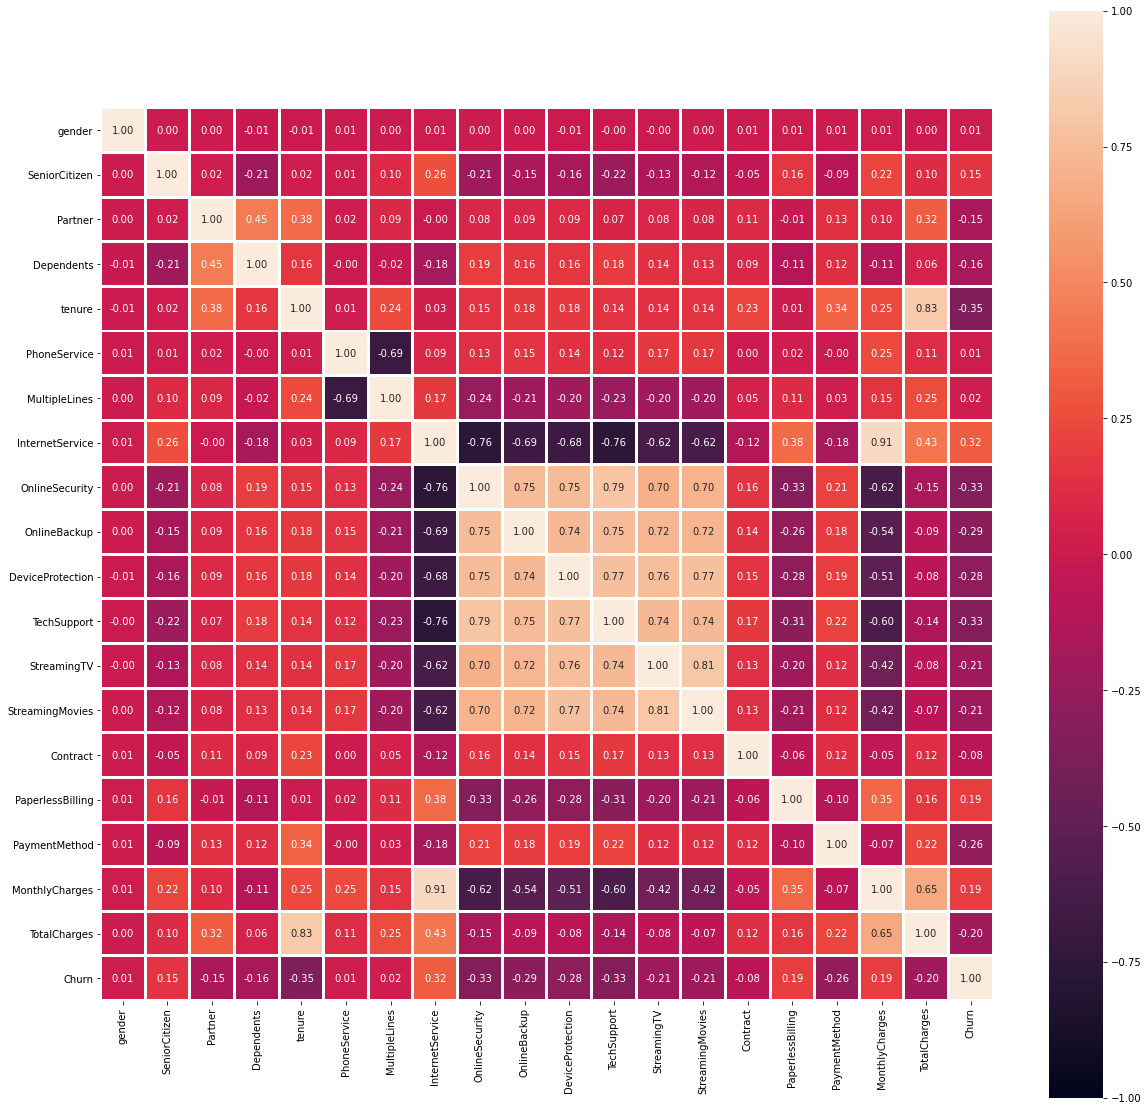

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, linewidths=2, fmt='.2f', vmin=-1, vmax=1, square=True)
plt.show()

# Check for outliers and also ploting hist graph of the dataset

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

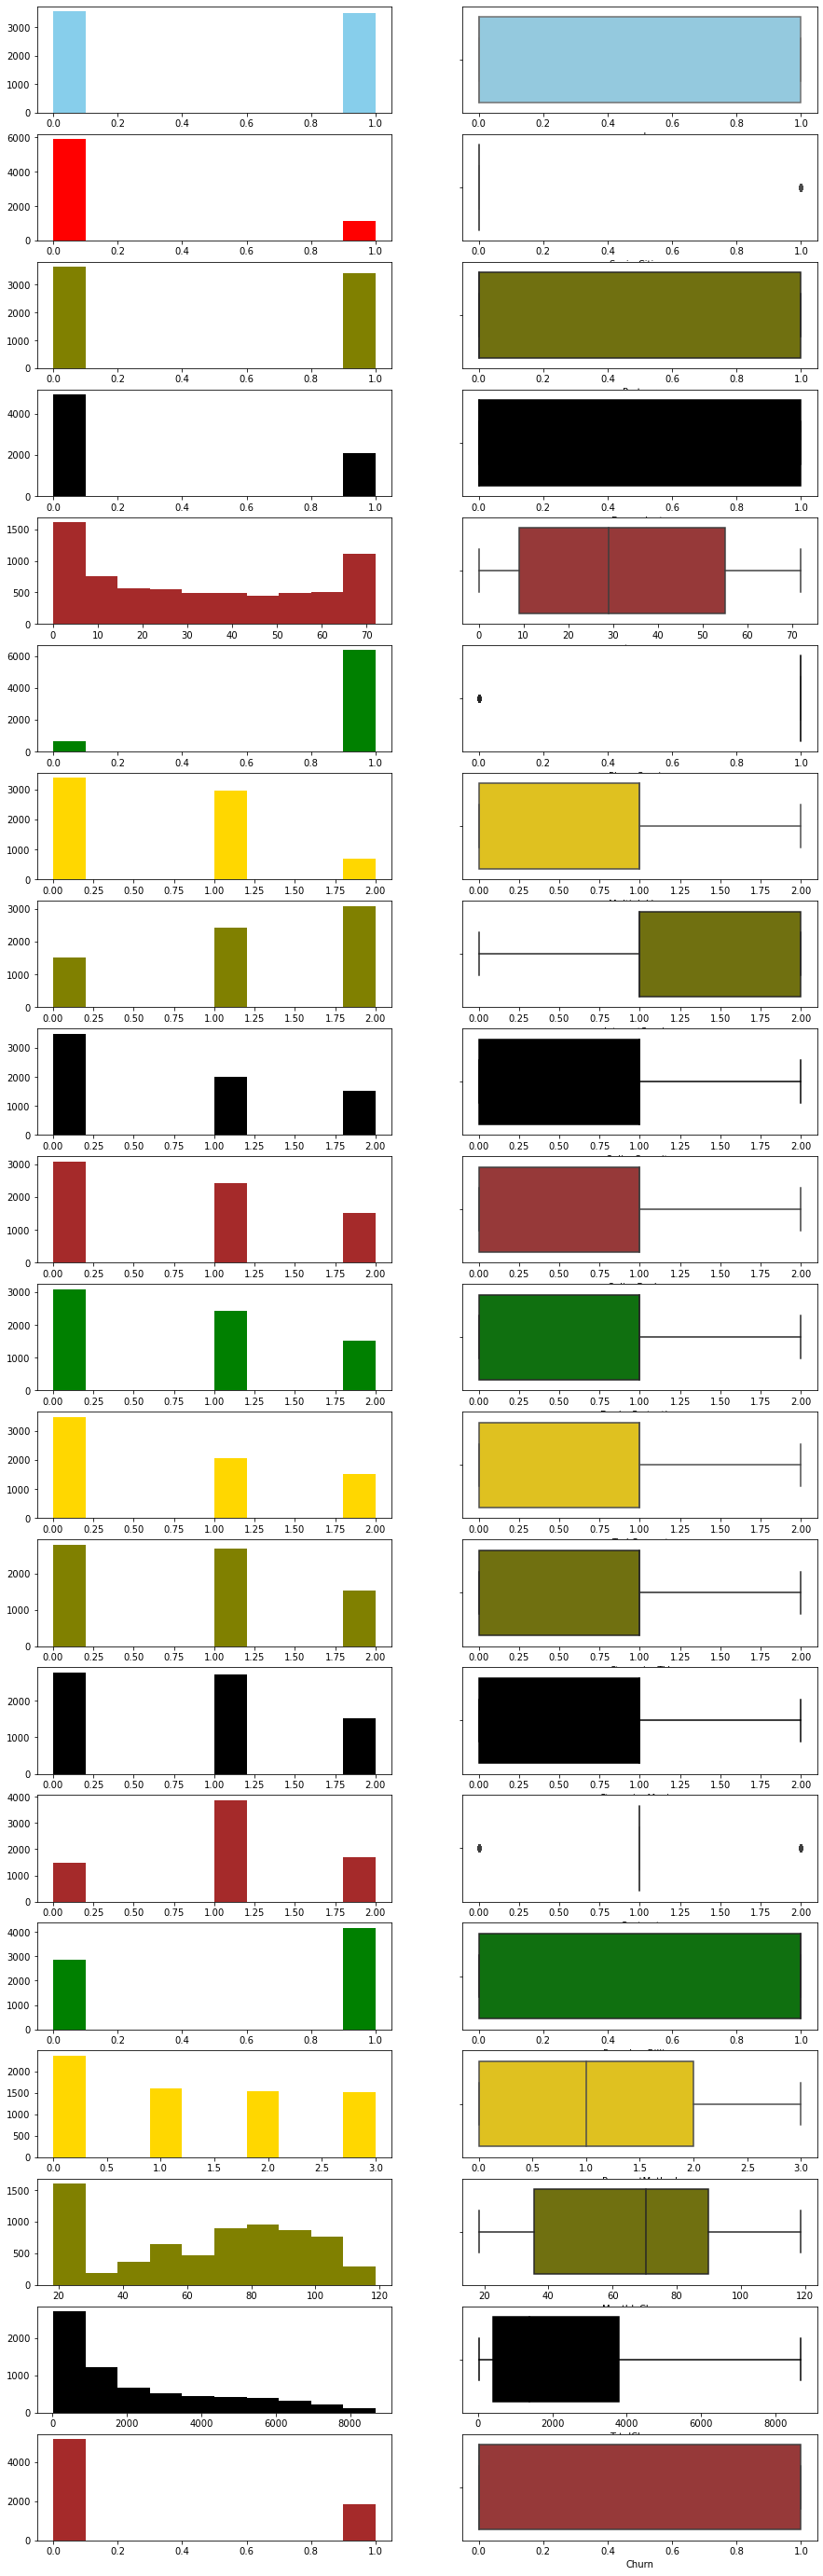

In [34]:
plt.figure(figsize=(15,50))
plt.subplot(20,2,1)
plt.hist(x=df.gender, color='skyblue', histtype='bar')
plt.subplot(20,2,2)
sns.boxplot(df.gender, color='skyblue')

plt.subplot(20,2,3)
plt.hist(x=df.SeniorCitizen, color='red', histtype='bar')
plt.subplot(20,2,4)
sns.boxplot(df.SeniorCitizen, color='red')

plt.subplot(20,2,5)
plt.hist(x=df.Partner, color='olive', histtype='barstacked')
plt.subplot(20,2,6)
sns.boxplot(df.Partner, color='olive')

plt.subplot(20,2,7)
plt.hist(x=df.Dependents, color='black', histtype='bar')
plt.subplot(20,2,8)
sns.boxplot(df.Dependents, color='black')

plt.subplot(20,2,9)
plt.hist(x=df.tenure, color='brown', histtype='bar')
plt.subplot(20,2,10)
sns.boxplot(df.tenure, color='brown')

plt.subplot(20,2,11)
plt.hist(x=df.PhoneService, color='green', histtype='bar')
plt.subplot(20,2,12)
sns.boxplot(df.PhoneService, color='green')

plt.subplot(20,2,13)
plt.hist(x=df.MultipleLines, color='gold', histtype='bar')
plt.subplot(20,2,14)
sns.boxplot(df.MultipleLines, color='gold')

plt.subplot(20,2,15)
plt.hist(x=df.InternetService, color='olive', histtype='barstacked')
plt.subplot(20,2,16)
sns.boxplot(df.InternetService, color='olive')

plt.subplot(20,2,17)
plt.hist(x=df.OnlineSecurity, color='black', histtype='bar')
plt.subplot(20,2,18)
sns.boxplot(df.OnlineSecurity, color='black')

plt.subplot(20,2,19)
plt.hist(x=df.OnlineBackup, color='brown', histtype='bar')
plt.subplot(20,2,20)
sns.boxplot(df.OnlineBackup, color='brown')

plt.subplot(20,2,21)
plt.hist(x=df.DeviceProtection, color='green', histtype='bar')
plt.subplot(20,2,22)
sns.boxplot(df.DeviceProtection, color='green')

plt.subplot(20,2,23)
plt.hist(x=df.TechSupport, color='gold', histtype='bar')
plt.subplot(20,2,24)
sns.boxplot(df.TechSupport, color='gold')

plt.subplot(20,2,25)
plt.hist(x=df.StreamingTV, color='olive', histtype='barstacked')
plt.subplot(20,2,26)
sns.boxplot(df.StreamingTV, color='olive')

plt.subplot(20,2,27)
plt.hist(x=df.StreamingMovies, color='black', histtype='bar')
plt.subplot(20,2,28)
sns.boxplot(df.StreamingMovies, color='black')

plt.subplot(20,2,29)
plt.hist(x=df.Contract, color='brown', histtype='bar')
plt.subplot(20,2,30)
sns.boxplot(df.Contract, color='brown')

plt.subplot(20,2,31)
plt.hist(x=df.PaperlessBilling, color='green', histtype='bar')
plt.subplot(20,2,32)
sns.boxplot(df.PaperlessBilling, color='green')

plt.subplot(20,2,33)
plt.hist(x=df.PaymentMethod, color='gold', histtype='bar')
plt.subplot(20,2,34)
sns.boxplot(df.PaymentMethod, color='gold')

plt.subplot(20,2,35)
plt.hist(x=df.MonthlyCharges, color='olive', histtype='barstacked')
plt.subplot(20,2,36)
sns.boxplot(df.MonthlyCharges, color='olive')

plt.subplot(20,2,37)
plt.hist(x=df.TotalCharges, color='black', histtype='bar')
plt.subplot(20,2,38)
sns.boxplot(df.TotalCharges, color='black')

plt.subplot(20,2,39)
plt.hist(x=df.Churn, color='brown', histtype='bar')
plt.subplot(20,2,40)
sns.boxplot(df.Churn, color='brown')

plt.show()

# Check skewness

In [35]:
df.skew()

gender              0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService    -0.410327
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract           -0.036430
PaperlessBilling   -0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
TotalCharges        0.963275
Churn               1.063031
dtype: float64

# Deviding data into features and vector

In [36]:
# independent column/features
x=df.iloc[:,:-1]
# target
y=df.iloc[:,-1]

# Transforming data to remove skewness:

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [40]:
x

array([[ 1.00955867, -0.43991649,  1.03453023, ..., -1.24202857,
        -1.1585412 , -1.80333283],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.08789406,
        -0.23949171,  0.25670407],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.08789406,
        -0.34266505, -1.38024567],
       ...,
       [ 1.00955867, -0.43991649,  1.03453023, ..., -1.24202857,
        -1.16724064, -0.8536474 ],
       [-0.99053183,  2.27315869,  1.03453023, ..., -0.08789406,
         0.33431207, -0.91660038],
       [-0.99053183, -0.43991649, -0.96662231, ...,  0.69892133,
         1.33886338,  1.48330252]])

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.00955867, -0.43991649,  1.03453023, ..., -1.24202857,
        -1.1585412 , -1.80333283],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.08789406,
        -0.23949171,  0.25670407],
       [-0.99053183, -0.43991649, -0.96662231, ..., -0.08789406,
        -0.34266505, -1.38024567],
       ...,
       [ 1.00955867, -0.43991649,  1.03453023, ..., -1.24202857,
        -1.16724064, -0.8536474 ],
       [-0.99053183,  2.27315869,  1.03453023, ..., -0.08789406,
         0.33431207, -0.91660038],
       [-0.99053183, -0.43991649, -0.96662231, ...,  0.69892133,
         1.33886338,  1.48330252]])

## Since the outcome "Churn" has only two variable we will use binary classification model.

# Train test Split

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3000)

# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

In [44]:
# Create empty list and append each model to list
models = []
models.append(("LOGR", LogisticRegression()))
models.append(("NAIVE BAYES", GaussianNB()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("KNN", KNeighborsClassifier()))

# Empty list for results of the evaluation
model_results = []

In [45]:
# Function: for each element in model list there will be an evaluation -> Results will be added to results df
def train_all_models(models):
    i = 1
    plt.figure(figsize=(15, 20))
    for method, model in models:
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)

        f_score = model.score(X_test, y_test)
        model_results.append((method, f_score))

        plt.subplot(3, 2, i)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        sns.heatmap(confusion_matrix(y_test, test_pred), annot=True, cmap="Greens")
        plt.title(model, fontsize=14)
        plt.xlabel('Test', fontsize=12)
        plt.ylabel('Predict', fontsize=12)
        df = pd.DataFrame(model_results).transpose()
        i+=1

# Show confusion matrix for each trained model 
    plt.show()
    df = pd.DataFrame(model_results)
    return df

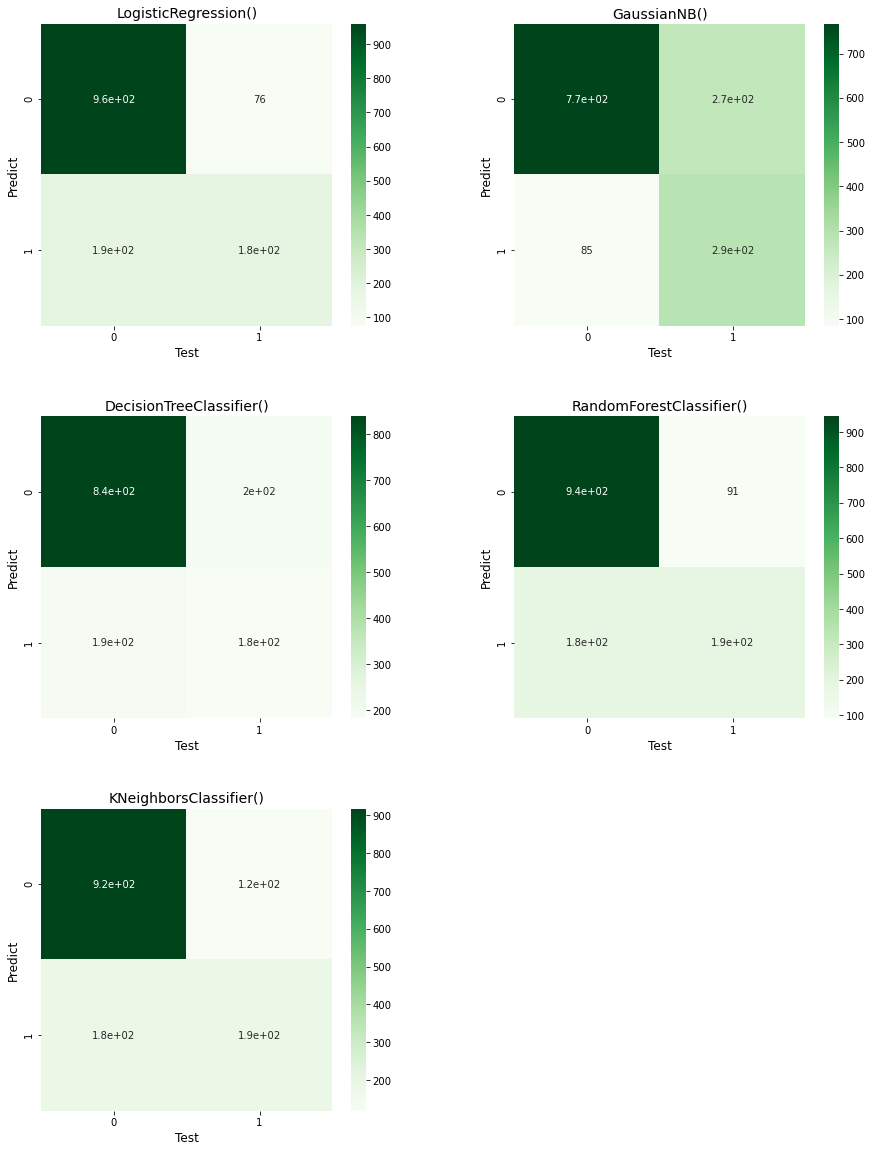

In [46]:
# Sort results df for later visualizations    
best_models = train_all_models(models)
best_models = best_models.sort_values([1], ascending=False)

In [47]:
best_models

,0,1
0,LOGR,0.812633
3,RF,0.804116
4,KNN,0.784244
1,NAIVE BAYES,0.749468
2,DT,0.724627


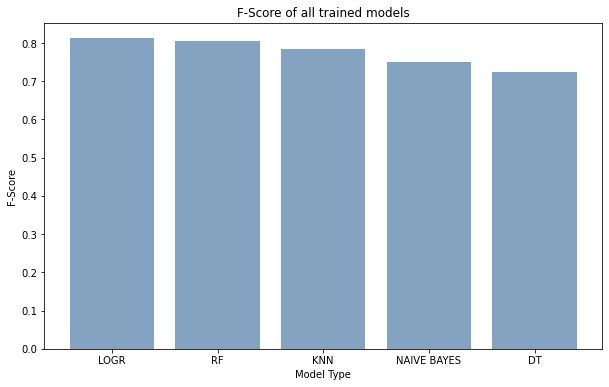

In [48]:
y_pos = np.arange(len(best_models[0]))
plt.figure(figsize=(10, 6))
plt.bar(y_pos, best_models[1], color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(y_pos, best_models[0])
plt.title('F-Score of all trained models')
plt.xlabel('Model Type')
plt.ylabel('F-Score')
plt.show()

# Hyperparameter Tuning

In [87]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [92]:
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(2,3,4,5,6)
param_grid = {'C': c_space}

grid_search = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv= 10, verbose=1, random_state=14)
grid_search.fit(X_train, y_train)

grid = grid_search.best_estimator_
print(grid)
print(grid_search.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
LogisticRegression(C=36.0)
0.8008499930715643


# Taking Model and train it again with best Hyperparameters

In [97]:
model = LogisticRegression(C=36.0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(f"Classification report\n {classification_report(pred, y_test)}")
print(f"Score = {model.score(X_test,y_test)}")

Classification report
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1148
           1       0.50      0.71      0.58       261

    accuracy                           0.81      1409
   macro avg       0.71      0.77      0.73      1409
weighted avg       0.85      0.81      0.82      1409

Score = 0.8126330731014905


# Plotting ROC Curve

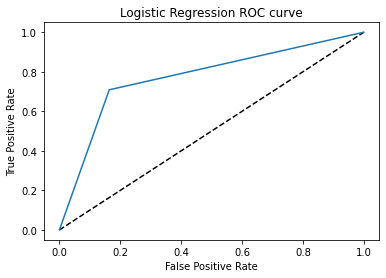

In [98]:
from sklearn.metrics import roc_curve
y_pred_prob = logr.predict_proba(X_test)[:,1]
frp, trp, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

# Saving the model

In [99]:
import joblib
joblib.dump(model,'Customer Churn Analysis.pkl')

['Customer Churn Analysis.pkl']